# SALES DATA ANALYSIS

By Ibrahim Zakari

In [1]:
#import libraries needed

import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")

In [2]:
#changing file directory
os.chdir('C:\\Users\\steep\\Desktop\\sales')

In [3]:
#make a list comprehesion
files = [file for file in os.listdir('C:\\Users\\steep\\Desktop\\sales')]

#create apandas dataframe
months_data = pd.DataFrame()

#make a loop for concatenating data
for file in files:
    data = pd.read_csv('C:\\Users\\steep\\Desktop\\sales\\' + file)
    months_data = pd.concat([months_data, data])
    
months_data.to_csv("sales_data.csv", index = False)

In [4]:
#retrieving final csv file 
sales_df = pd.read_csv("sales_data.csv")

sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Lets start by exploring and cleaning of our data
Things to look out for
1. duplicates
2. NA and Null values
3. check for appropriate data types for each column


In [5]:
#check and drop duplicates
sales_df.duplicated().sum()

1162

In [6]:
df = sales_df.drop_duplicates()

In [22]:
#checking null values
sales_df.isnull().sum(axis = 1)

0         0
1         6
2         0
3         0
4         0
         ..
186845    0
186846    0
186847    0
186848    0
186849    0
Length: 186850, dtype: int64

In [23]:
#there are some null values which could be dealt with by dropping or filling up.
#after making a thorough search it seems the null values are for an entire row which means we can drop all

#dropping null values
df = sales_df.dropna(axis = 0, how = "all")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [24]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [25]:
df.shape

(186305, 6)

In [26]:
#check dtypes and convert to appropriate dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [27]:
df["Price Each"] = pd.to_numeric(df["Price Each"], errors = "coerce").astype("float")


In [36]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], errors = 'coerce')

In [37]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int64")

In [33]:
#further dropping of nan values
df.dropna(axis = 0, how = "any", inplace = True)

In [34]:
#converting dtype
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [38]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [42]:
#leck for duplications again
df.duplicated().sum()

264

In [49]:
df2 = df.drop_duplicates()

In [44]:
df2.duplicated().sum()

0

In [45]:
df2.shape

(185686, 6)

In [46]:
#summary info of our dataset
pd.DataFrame({"Unique" : df.nunique(),
                 "Null": df.isnull().sum()}).T

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Unique,178437,19,9,17,142395,140787
Null,0,0,0,0,0,0


Till this state it can be confirmed that our dataset has been well cleaned is ready for further analysis

In [51]:
#we need to do some feature manupulations to get new data columns to help us analyse the data.

import calendar

#extracting year and month from order date column

#year
df2["Year"] = df2["Order Date"].dt.year

#month
df2["Month"] =df2["Order Date"].dt.month


#hour
df2["Hour"] = df2["Order Date"].dt.hour


In [52]:
#converting numeric month to string
df2["Month"] = df2['Month'].apply(lambda x: calendar.month_name[x])

In [53]:
#classifying months into quaters of the year
df2['Quarter'] = pd.PeriodIndex(df2['Order Date'], freq='Q').strftime('Q%q')

In [54]:
#creating revenue column
df2["Revenue"] = df2["Quantity Ordered"] * df2["Price Each"]

In [55]:
#extract cities from the purchase address
def location(data):
    
    def city(address):
        return address.split(",")[1]
    
    def state(address):
        return address.split(",")[2].split(" ")[1]
    
    data["Cities"] = data["Purchase Address"].apply(lambda x: f"{city(x)} ({state(x)})")
    
    return data


df2 = location(df2)

In [56]:
# till this stage we have generated all data that is needed to further the analysis of the dataset
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Quarter,Revenue,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,April,8,Q2,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,April,22,Q2,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,14,Q2,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,14,Q2,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,April,9,Q2,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,September,20,Q3,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,September,16,Q3,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,September,7,Q3,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,September,17,Q3,379.99,San Francisco (CA)


# Visualization of Data

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Quantity Ordered'),
  Text(0, 1.5, 'Price Each'),
  Text(0, 2.5, 'Year'),
  Text(0, 3.5, 'Hour'),
  Text(0, 4.5, 'Revenue')])

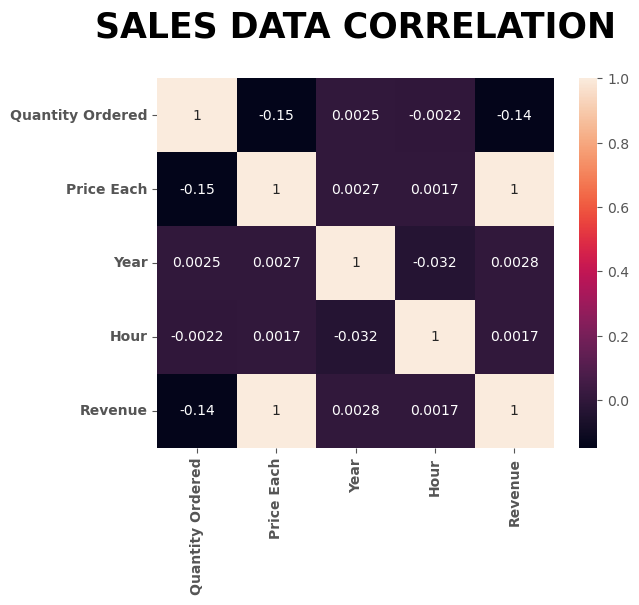

In [57]:
#sales data correlation
#in this context, correlation simply means the relationship between two or more columns

heatmap = df2.corr()

sns.heatmap(heatmap, annot = True, cmap = "rocket")
plt.title("SALES DATA CORRELATION", fontsize = 25, weight = "bold", pad = 30)
sns.set_context("paper", font_scale = 1.2)
plt.xticks(weight = "bold", rotation = 90)
plt.yticks(weight = "bold")


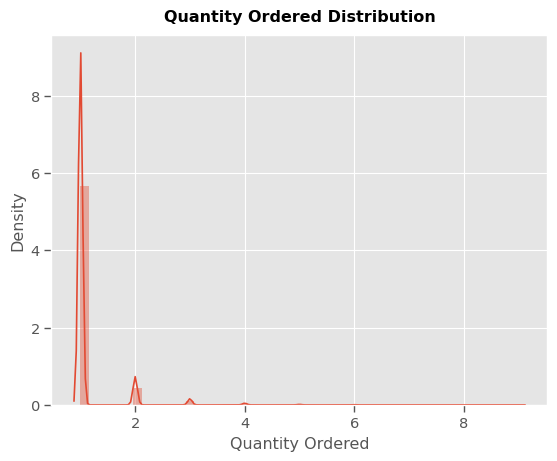

In [58]:
sns.distplot(df2["Quantity Ordered"], kde = True)
plt.title("Quantity Ordered Distribution",weight = "bold", pad = 10)
sns.set_context("paper")

This indicates that most of the customer orders are of the quantity 1.

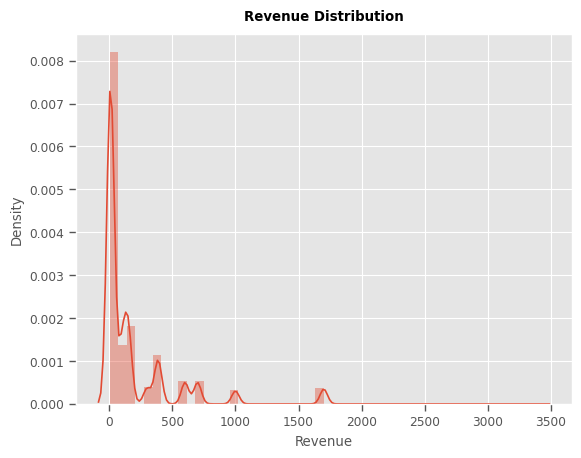

In [59]:
sns.distplot(df2["Revenue"], kde = True)
plt.title("Revenue Distribution", weight = "bold",pad = 10)
sns.set_context("paper")

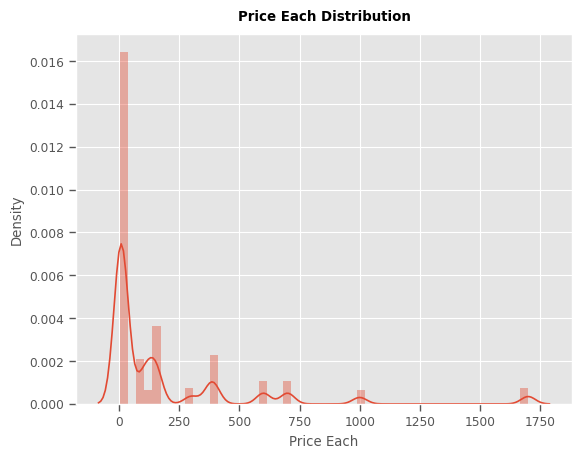

In [60]:
sns.distplot(df2["Price Each"], kde = True)
plt.title("Price Each Distribution",weight = "bold", pad = 10)
sns.set_context("paper")

<AxesSubplot:xlabel='Quantity Ordered', ylabel='Revenue'>

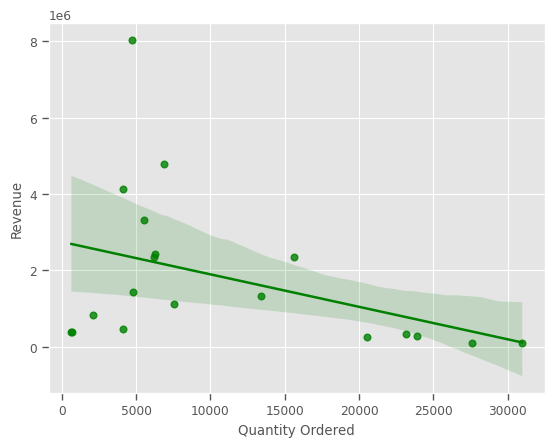

In [61]:
#let see the correlation between revenue and the quantity of each item

#firts make a df
quan_rev = pd.DataFrame(df2.groupby("Product")[["Revenue", "Quantity Ordered"]].sum())

#plotting the regression plot
sns.regplot(x="Quantity Ordered", y = "Revenue", data = quan_rev, color = "g") 

Based on the regression plot, it can be assumed that there is a bit of strong relationship between the revenue and quantity ordered since most of the data points are clustered around the regression line and also the steepness of the reqression line

Text(0.5, 1.0, 'Total Revenue of each product')

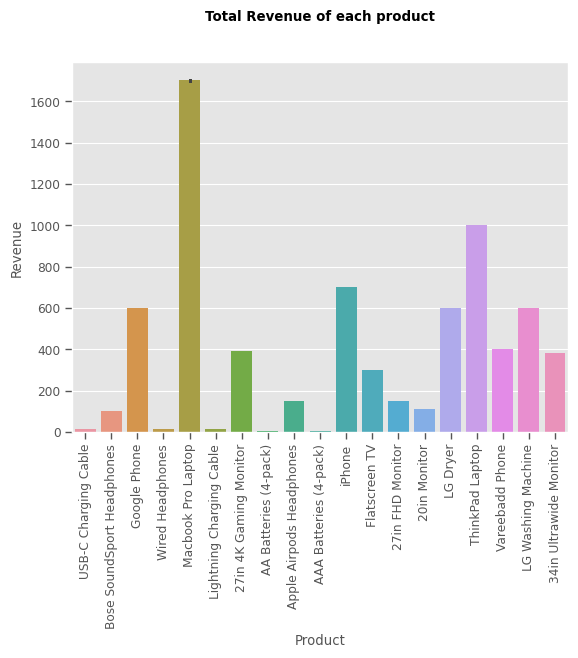

In [62]:
rev_item = pd.DataFrame(df2.groupby("Product")["Revenue"].sum())
sns.barplot(x = 'Product', y = "Revenue", data=df2)
plt.xticks(rotation = 90)
plt.title("Total Revenue of each product", weight = "bold",pad = 30)

The above chart shows that the MacBiik Pro is the product with the highest revenue. But on further analysis it is not the most selling interms of quantiy sold. This is as a result of it being a product with a high price tag.

Text(0.5, 1.0, 'Most Selling Product')

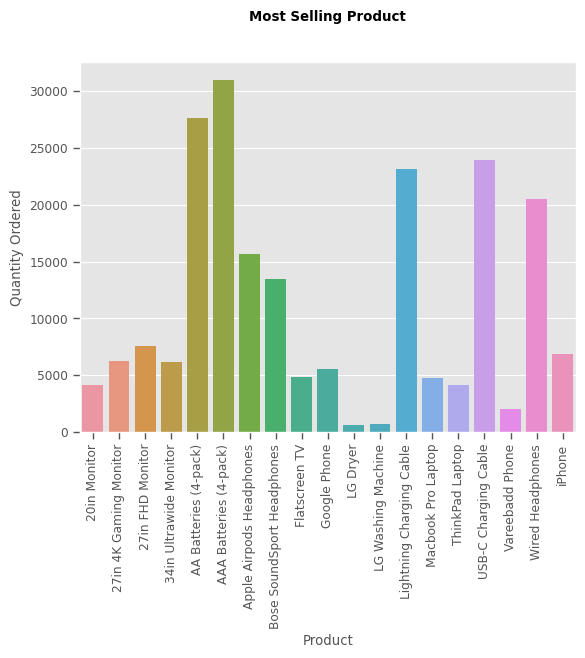

In [63]:
#most selling product

#create a dataframe
most_sell = pd.DataFrame(df2.groupby("Product")["Quantity Ordered"].sum())

#create a bar plot
sns.barplot(x = most_sell.index, y = most_sell["Quantity Ordered"])
plt.xticks(rotation= 90)
plt.title("Most Selling Product",weight = "bold", pad = 30)

From the above chart AAA Batteries (4-pack) and AA Batteries (4-pack) are the top two most selling products. Interms of revenue they are the least and this is due to their low price tags.

Text(0.5, 1.0, ' Sales Revenue by each City')

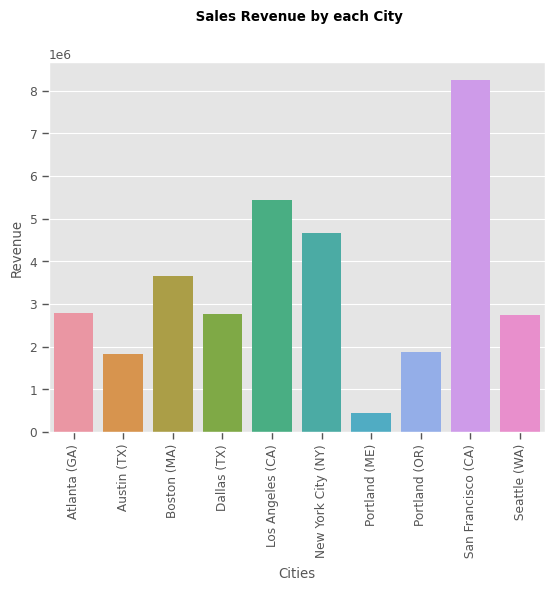

In [64]:
rev_city = pd.DataFrame(df2.groupby("Cities")["Revenue"].sum())

sns.barplot(x = rev_city.index, y = rev_city["Revenue"])
plt.xticks(rotation= 90)
plt.title(" Sales Revenue by each City",weight = "bold", pad = 30)

Text(0.5, 1.0, 'Monthly Sales')

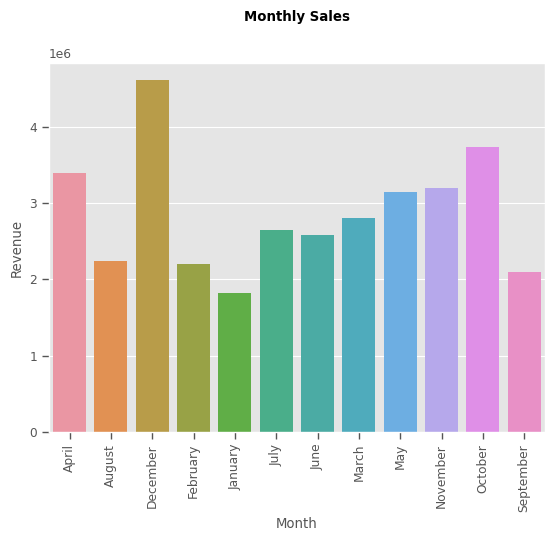

In [65]:
#monthly revenue
m_sales = pd.DataFrame(df2.groupby("Month")["Revenue"].sum())

#barplot
sns.barplot(x = m_sales.index, y = m_sales["Revenue"])
plt.xticks(rotation=90)
plt.title("Monthly Sales",weight = "bold", pad = 30)

Text(0.5, 1.0, 'Quaterly Sales')

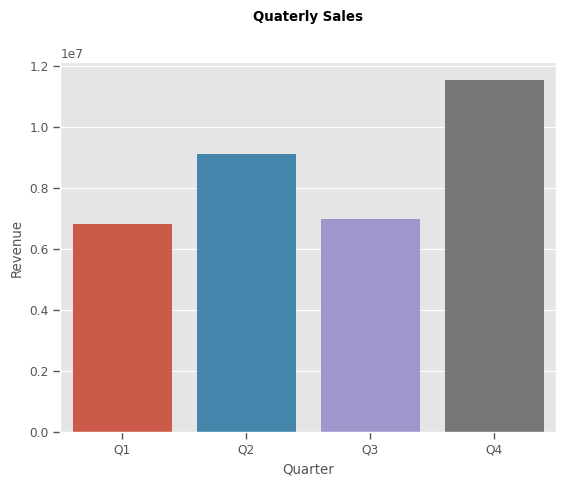

In [66]:
#quaterly revenue
q_sales = pd.DataFrame(df2.groupby("Quarter")["Revenue"].sum())
sns.barplot(x = q_sales.index, y = q_sales["Revenue"])
plt.title("Quaterly Sales",weight = "bold", pad = 30)

Text(0.5, 1.0, 'Yearly Sales')

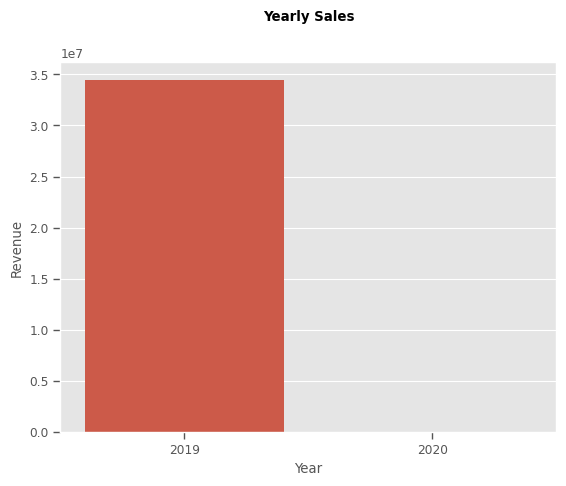

In [67]:
#yearly revenue
y_sales = pd.DataFrame(df2.groupby("Year")["Revenue"].sum())

#barplot
sns.barplot(x = y_sales.index, y = y_sales["Revenue"])
#plt.xticks(rotation=90)
plt.title("Yearly Sales",weight = "bold", pad = 30)

<Figure size 2400x1000 with 0 Axes>

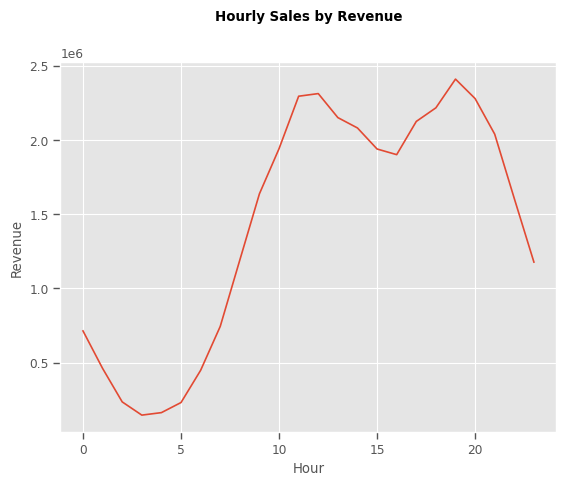

<Figure size 2400x1000 with 0 Axes>

In [68]:
h_sales = pd.DataFrame(df2.groupby("Hour")["Revenue"].sum())

#barplot
sns.lineplot(x = h_sales.index, y = h_sales["Revenue"])
#plt.xticks(rotation=90)
plt.title("Hourly Sales by Revenue",weight = "bold", pad = 30)
plt.figure(figsize = (24,10))

The above and below plot shows the peak sales hours. This can be used to make decisions on when to start promotional sales based on time of the day. Also this plot can help schedule the working hours and number of work force needed in cases where the sales are not done online.

<Figure size 2400x1000 with 0 Axes>

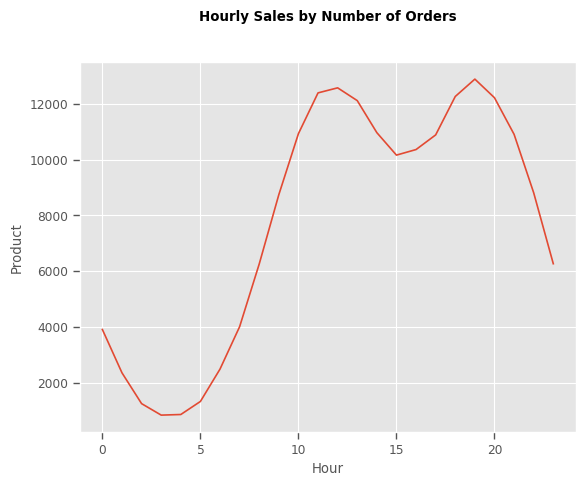

<Figure size 2400x1000 with 0 Axes>

In [69]:
ht_sales = pd.DataFrame(df2.groupby("Hour")["Product"].count())

#barplot
sns.lineplot(x = ht_sales.index, y = ht_sales["Product"])
#plt.xticks(rotation=90)
plt.title("Hourly Sales by Number of Orders",weight = "bold", pad = 30)
plt.figure(figsize = (24,10))

# Conclusion

The downside of this analysis is that there was no enough data for the year 2020. This prevented the possibilities of making a more indepth analysis for comparism. With such little information, it will be difficult to make well informed decisions that will help to improve the business.

In [76]:
y_sales

,Revenue
Year,
2019,34456867.65
2020,8670.29


In [75]:
m_sales.nlargest(3,"Revenue")

,Revenue
Month,
December,4608295.70
October,3734777.86
April,3389217.98


In [78]:
rev_city.nlargest(3, "Revenue")

,Revenue
Cities,
San Francisco (CA),8254743.55
Los Angeles (CA),5448304.28
New York City (NY),4661867.14


In [79]:
q_sales

,Revenue
Quarter,
Q1,6826464.59
Q2,9116114.36
Q3,6982010.38
Q4,11540948.61
